# **Goal: 다음 분기에 어떤 게임을 설계해야 하는가?**

1) 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2) 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 데이터 불러오기 및 데이터 전처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False) 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(url, index_col=1)
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# 결측값 확인
df.isnull().sum()

# 'Year'에 년도가 아닌 숫자 값들도 결측 처리
df.loc[df['Year'] < 1950] = None

# 2017년 이후 발매작(4개)이 매우 적으므로, 제외
df.loc[df['Year'] > 2016] = None

# 결측값 제거
df = df.dropna()

In [ ]:
# year를 int로 변환
df['Year'] = df['Year'].astype(int)

In [ ]:
genre = df['Genre'].value_counts().index.tolist()
genre

platform = df['Platform'].value_counts().index.tolist()
platform

publisher = df['Publisher'].value_counts().index.tolist()
publisher.sort()

In [ ]:
from matplotlib.pyplot import style

style.use('fivethirtyeight')

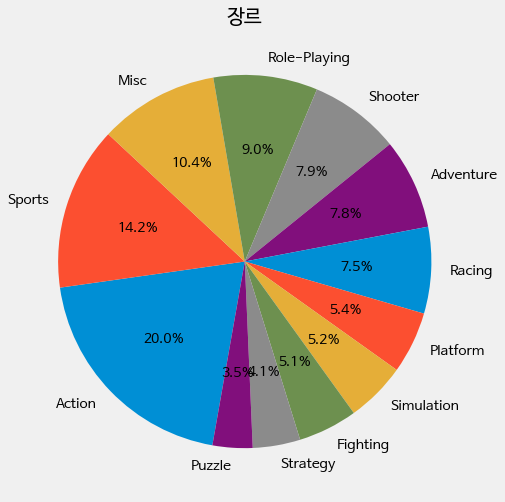

In [ ]:
label1 = genre
ratio1 = df['Genre'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio1, labels=label1, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('장르', fontsize=20)

plt.show()

In [ ]:
platform_val = platform
platform_val[16:] = ['기타']

platform_valcount = df['Platform'].value_counts().values.tolist()
platform_valcount[16:] = [943]

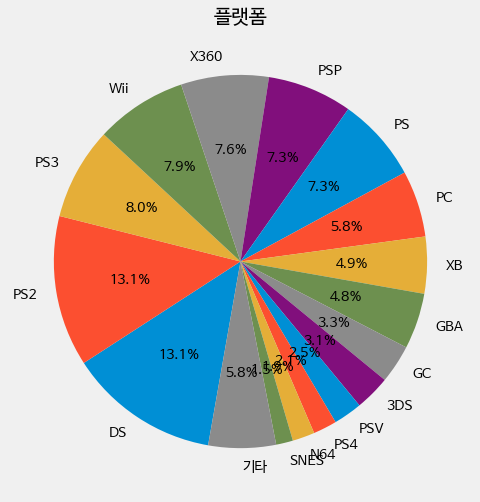

In [ ]:
label2 = platform_val
ratio2 = platform_valcount

plt.figure(figsize=(10, 8))
plt.pie(ratio2, labels=label2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('플랫폼', fontsize=20)

plt.show()

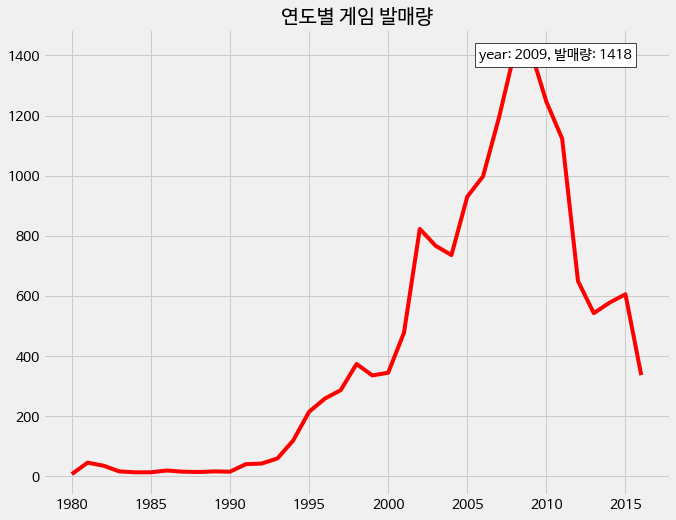

In [ ]:
# 년도 별 
year_publish = df['Year'].value_counts().index.tolist()
year_publish.sort()

year_pub_number = df.groupby(['Year']).size().tolist()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.plot(year_publish, year_pub_number, color='red')

def annot_max(x, y, ax=None):
    ymax = max(year_pub_number)
    xpos = year_pub_number.index(ymax)
    xmax = year_publish[xpos]
    text= "year: {}, 발매량: {}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(year_publish, year_pub_number)
plt.title('연도별 게임 발매량', fontsize=20)

plt.show()

In [ ]:
# K = '1000' -> 기존 숫자 값 * 1000
# M = '1000000' -> 기존 숫자 값 * 1000000

def convert(x):  
  if 'K' in x:
    x = x.replace('K','')
    x = pd.to_numeric(x)
    return x * 1000
  elif 'M' in x:
    x = x.replace('M','')
    x = pd.to_numeric(x)
    return x * 1000000
  else:
    return pd.to_numeric(x)

df['NA_Sales'] = df['NA_Sales'].apply(convert)
df['EU_Sales'] = df['EU_Sales'].apply(convert)
df['JP_Sales'] = df['JP_Sales'].apply(convert)
df['Other_Sales'] = df['Other_Sales'].apply(convert)

In [ ]:
# Year column의 변수를 5년 단위로 묶은 feature('5Years') 생성
df['5Years'] = df['Year']
df.loc[df['5Years'] < 1990, '5Years'] = 1988
df.loc[(df['5Years'] < 1996) & (df['5Years'] >= 1990), '5Years'] = 1993
df.loc[(df['5Years'] >= 1996) & (df['5Years'] < 2001), '5Years'] = 1998
df.loc[(df['5Years'] >= 2001) & (df['5Years'] < 2006), '5Years'] = 2003
df.loc[(df['5Years'] >= 2006) & (df['5Years'] < 2011), '5Years'] = 2008
df.loc[df['5Years'] >= 2011, '5Years'] = 2013

In [ ]:
# 총 판매량('total_sales') feature 생성
df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# outlier 처리

게임 판매량 관련 연구를 찾아본 결과, 관련 연구는 게임 판매량 연구를 주로 판매량 상위 n개 게임들을 선별하여 데이터 분석을 진행.

In [ ]:
df = df.sort_values(by='total_sales', ascending=False)

In [ ]:
# 결측치 범위 정하기
# Cox(2013)는 2010년 9월까지의 게임별 누적 판매량 데이터를 정리하면서, 상위 10%의 타이틀이 게임 전체 판매의 54%를 차지하고 있음을 지적하였다.
# Jeffery Babb & Neil Terry(2013)의 연구 또한 판매량 상위 top 100에 있는 게임을 대상으로 분석을 진행하였다.
# 반면 여기서 사용하는 데이터의 상위 10%의 타이틀(1614개)는 Cox가 말한 비중보다 더 높은 비중(99.99%)를 차지하고 있음을 확인할 수 있다.
# 즉, 대다수의 게임들은 유의미한 판매량을 기록하지 못하고 있음을 확인할 수 있다.유의미한 데이터를 도출하기 위해 보다 좁은 기준을 정할 필요가 있음. 
# 그 기준은 상위 444개까지(전체 총 판매량의 99%). 444와 445의 판매량의 차이가 각각 10000과 82.74로 급격한 차이가 나기 때문.

top10p = (df['total_sales'].head(1614).sum() / df['total_sales'].sum()) * 100
print(top10p)

for i in range(16137):
  sum_total = df['total_sales'].sum()
  sum_partial = df['total_sales'].head(i).sum() 
  proportion = (sum_partial/sum_total) * 100
  if proportion < 99.99:
    pass
  else:
    print(i)
    break

99.99706669708273
444


In [ ]:
# outlier 제거 : 판매량 top 444개 미만을 outlier로 정의.
# 결측치 제거를 완료한 dataframe을 'df1'으로 새로 정의

df1 = df.head(444)

In [ ]:
# 다시 outlier 처리 : 1881~1990까지 년도 별 출시작이 하나씩밖에 없기 때문에 삭제
df1 = df1[df1['Year'] > 1990]

In [ ]:
df1

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,5Years,total_sales
Name,,,,,,,,,,
Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,2013,9630006.75
Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,2008,7030002.84
Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,1998,5550004.32
The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,1998,4100003.50
Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,2003,3150007.34
...,...,...,...,...,...,...,...,...,...,...
Touhou Genso Rondo: Bullet Ballet,PS4,2016,Shooter,Nippon Ichi Software,10000.00,0.00,0.00,0.00,2013,10000.00
"Pachi-Slot Teiou: Golgo 13 Las Vegas (JP sales, but wrong system)",PS2,2002,Misc,Media Entertainment,0.00,0.00,10000.00,0.00,2003,10000.00
Hoshigami: Ruining Blue Earth Remix,DS,2007,Role-Playing,505 Games,0.00,0.00,10000.00,0.00,2008,10000.00


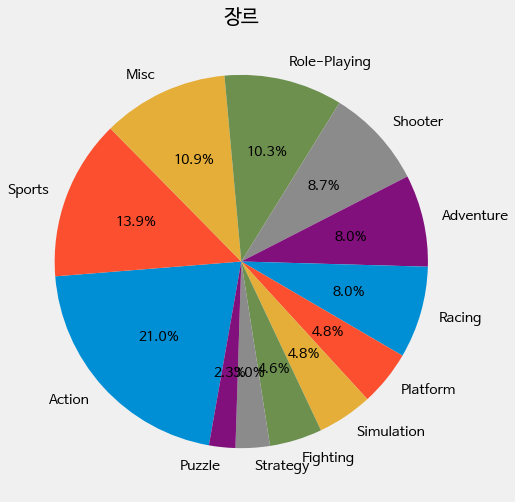

In [ ]:
ratio1_df1 = df1['Genre'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio1_df1, labels=label1, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('장르', fontsize=20)

plt.show()

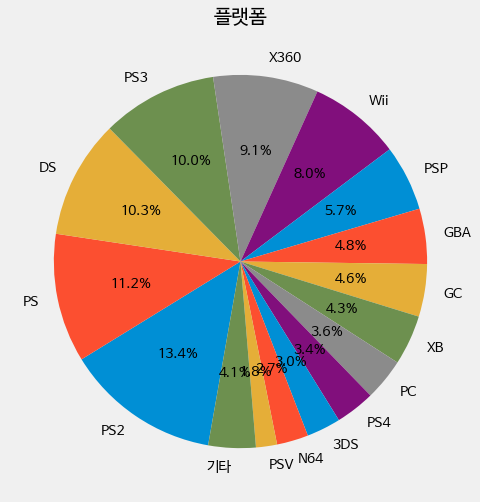

In [ ]:
label2 = df1['Platform'].value_counts().index.tolist()
label2[15:] = ['기타']

ratio2_df1 = df1['Platform'].value_counts().values.tolist()
ratio2_df1[15:] = [18]

plt.figure(figsize=(10, 8))
plt.pie(ratio2_df1, labels=label2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('플랫폼', fontsize=20)

plt.show()

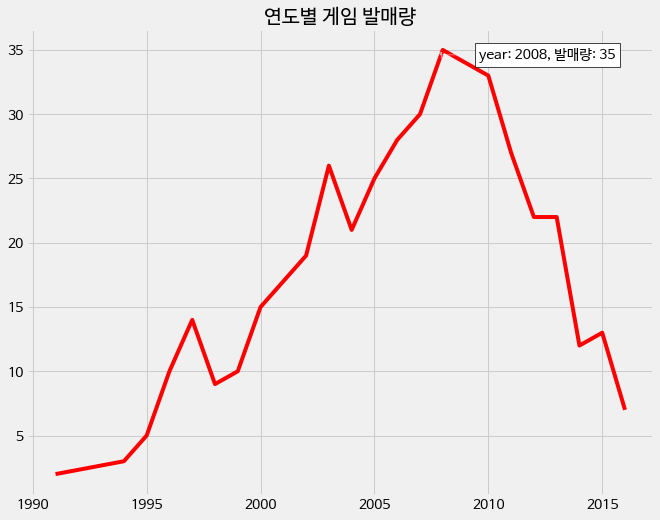

In [ ]:
# 년도 별 
year_publish2 = df1['Year'].value_counts().index.tolist()
year_publish2.sort()

year_pub_number2 = df1.groupby(['Year']).size().tolist()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.plot(year_publish2, year_pub_number2, color='red')

def annot_max(x, y, ax=None):
    ymax = max(year_pub_number2)
    xpos = year_pub_number2.index(ymax)
    xmax = year_publish2[xpos]
    text= "year: {}, 발매량: {}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(year_publish2, year_pub_number2)
plt.title('연도별 게임 발매량', fontsize=20)

plt.show()

# 지역 별 선호 게임 장르

In [ ]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**지역 내에서 선호하는 장르의 차이 여부 : ANOVA 사용**

In [ ]:
# 북미 지역 내의 장르별 평균 차이 분석
import warnings
warnings.filterwarnings('ignore')

# the "C" indicates categorical data
model = ols('NA_Sales ~ C(Genre)', df1).fit()

anova_lm(model)
na_pval = anova_lm(model).at['C(Genre)', 'PR(>F)']

if na_pval < 0.05:
  print("북미 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다.", na_pval)
else:
  print("북미 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다.", na_pval)

북미 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다. 0.8296714585764762


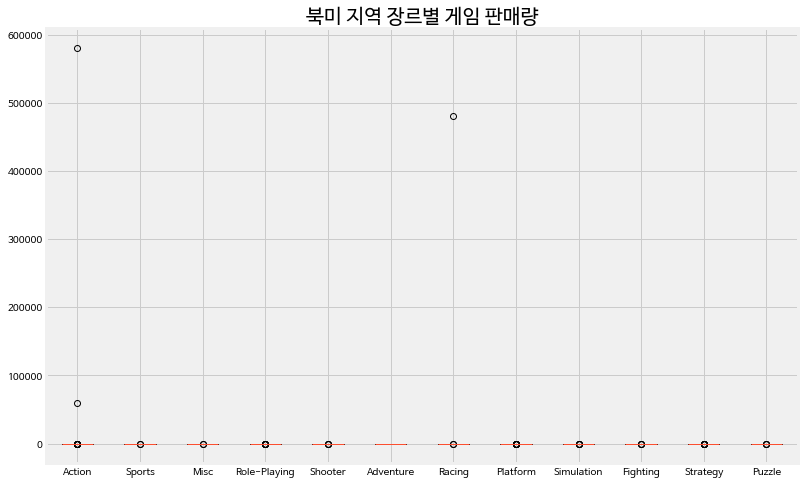

In [ ]:
NA_Genre_Sales = df1[['Genre', 'NA_Sales']]
NA_Genre_Sales = NA_Genre_Sales.reset_index(drop=True)
NA_Genre_Sales = NA_Genre_Sales.set_index('Genre')

NA_Action = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Action']
NA_Adventure = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Adventure']
NA_Fighting = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Fighting']
NA_Misc = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Misc']
NA_Platform = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Platform']
NA_Puzzle = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Puzzle']
NA_Racing = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Racing']
NA_RolePlaying = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Role-Playing']
NA_Shooter = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Shooter']
NA_Simulation = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Simulation']
NA_Sports = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Sports']
NA_Strategy = NA_Genre_Sales.loc[NA_Genre_Sales.index == 'Strategy']

fig = plt.figure(figsize=(12, 8))
plot_data = [NA_Action, NA_Adventure, NA_Fighting, NA_Misc, NA_Platform, NA_Puzzle, NA_Racing, NA_RolePlaying, NA_Shooter, NA_Simulation, NA_Sports, NA_Strategy]
ax = plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], genre)
plt.title('북미 지역 장르별 게임 판매량', fontsize=20)
plt.show()

In [ ]:
# 유럽 지역 내의 장르별 평균 차이 분석
# the "C" indicates categorical data
model = ols('EU_Sales ~ C(Genre)', df1).fit()

anova_lm(model)
eu_pval = anova_lm(model).at['C(Genre)', 'PR(>F)']

if eu_pval < 0.05:
  print("유럽 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다.", eu_pval)
else:
  print("유럽 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다.", eu_pval)

유럽 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다. 0.37575931664986817


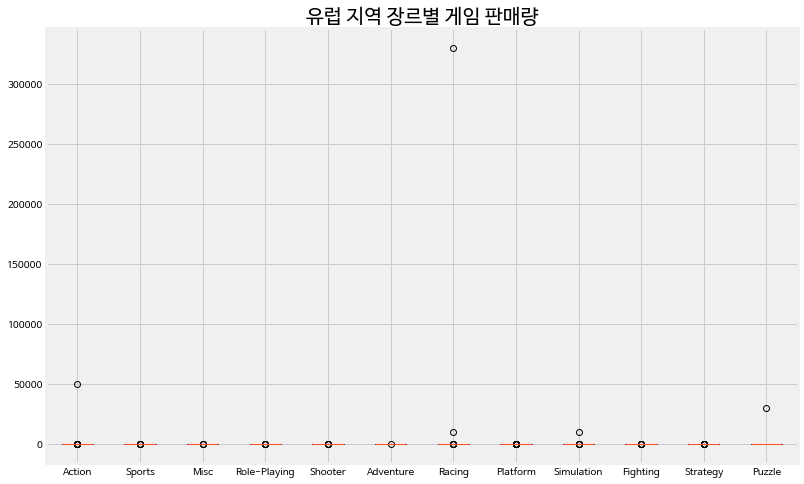

In [ ]:
EU_Genre_Sales = df1[['Genre', 'EU_Sales']]
EU_Genre_Sales = EU_Genre_Sales.reset_index(drop=True)
EU_Genre_Sales = EU_Genre_Sales.set_index('Genre')

EU_Action = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Action']
EU_Adventure = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Adventure']
EU_Fighting = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Fighting']
EU_Misc = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Misc']
EU_Platform = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Platform']
EU_Puzzle = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Puzzle']
EU_Racing = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Racing']
EU_RolePlaying = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Role-Playing']
EU_Shooter = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Shooter']
EU_Simulation = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Simulation']
EU_Sports = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Sports']
EU_Strategy = EU_Genre_Sales.loc[EU_Genre_Sales.index == 'Strategy']

fig = plt.figure(figsize=(12, 8))
plot_data = [EU_Action, EU_Adventure, EU_Fighting, EU_Misc, EU_Platform, EU_Puzzle, EU_Racing, EU_RolePlaying, EU_Shooter, EU_Simulation, EU_Sports, EU_Strategy]
ax = plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], genre)
plt.title('유럽 지역 장르별 게임 판매량', fontsize=20)
plt.show()

In [ ]:
# 일본 지역 내의 장르별 평균 차이 분석
# the "C" indicates categorical data
model = ols('JP_Sales ~ C(Genre)', df1).fit()

anova_lm(model)
jp_pval = anova_lm(model).at['C(Genre)', 'PR(>F)']

if jp_pval < 0.05:
  print("일본 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다.", jp_pval)
else:
  print("일본 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다.", jp_pval)

일본 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다. 1.2670685008943343e-05


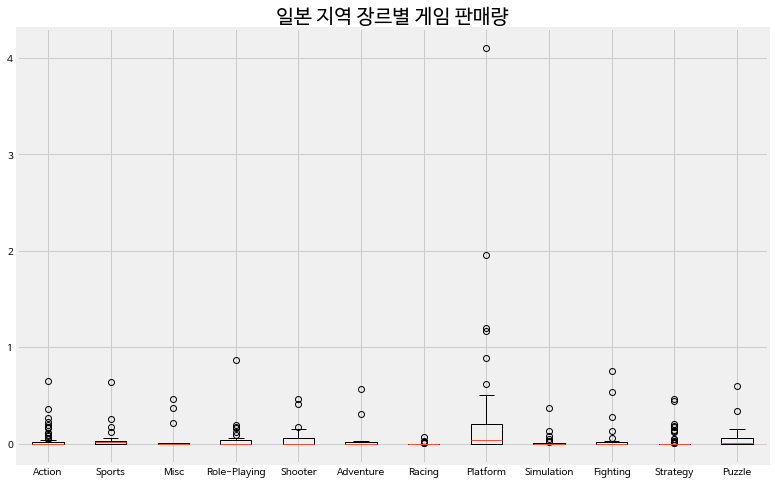

In [ ]:
JP_Genre_Sales = df1[['Genre', 'JP_Sales']]
JP_Genre_Sales = JP_Genre_Sales.reset_index(drop=True)
JP_Genre_Sales = JP_Genre_Sales.set_index('Genre')

JP_Action = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Action']
JP_Adventure = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Adventure']
JP_Fighting = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Fighting']
JP_Misc = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Misc']
JP_Platform = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Platform']
JP_Puzzle = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Puzzle']
JP_Racing = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Racing']
JP_RolePlaying = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Role-Playing']
JP_Shooter = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Shooter']
JP_Simulation = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Simulation']
JP_Sports = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Sports']
JP_Strategy = JP_Genre_Sales.loc[JP_Genre_Sales.index == 'Strategy']

fig = plt.figure(figsize=(12, 8))
plot_data = [JP_Action, JP_Adventure, JP_Fighting, JP_Misc, JP_Platform, JP_Puzzle, JP_Racing, JP_RolePlaying, JP_Shooter, JP_Simulation, JP_Sports, JP_Strategy]
ax = plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], genre)
plt.title('일본 지역 장르별 게임 판매량', fontsize=20)
plt.show()

In [ ]:
JP_Genre_Sales = JP_Genre_Sales.reset_index()
JP_Genre_Sales

,Genre,JP_Sales
0,Action,0.00
1,Action,0.00
2,Adventure,0.02
3,Misc,0.00
4,Platform,0.00
...,...,...
432,Adventure,0.00
433,Racing,0.00
434,Misc,0.03
435,Action,0.00


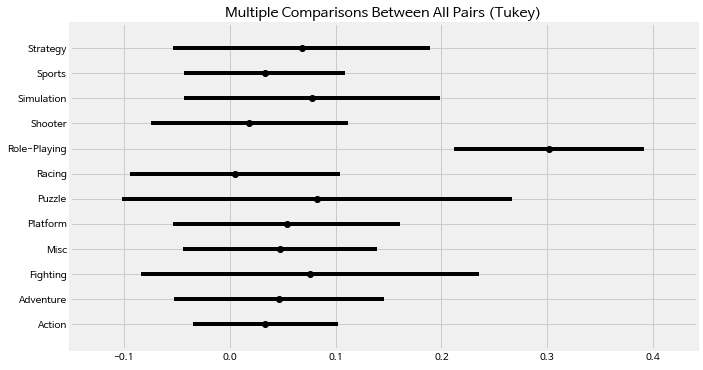

In [ ]:
# 사후 검정 : Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(JP_Genre_Sales['JP_Sales'], JP_Genre_Sales['Genre'], alpha=0.05)
fig = posthoc.plot_simultaneous()

In [ ]:
# 기타 지역 내의 장르별 평균 차이 분석
# the "C" indicates categorical data
model = ols('Other_Sales ~ C(Genre)', df1).fit()

anova_lm(model)
other_pval = anova_lm(model).at['C(Genre)', 'PR(>F)']

if other_pval < 0.05:
  print("기타 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다.", other_pval)
else:
  print("기타 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다.", other_pval)

기타 지역의 장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다. 0.5741173403411233


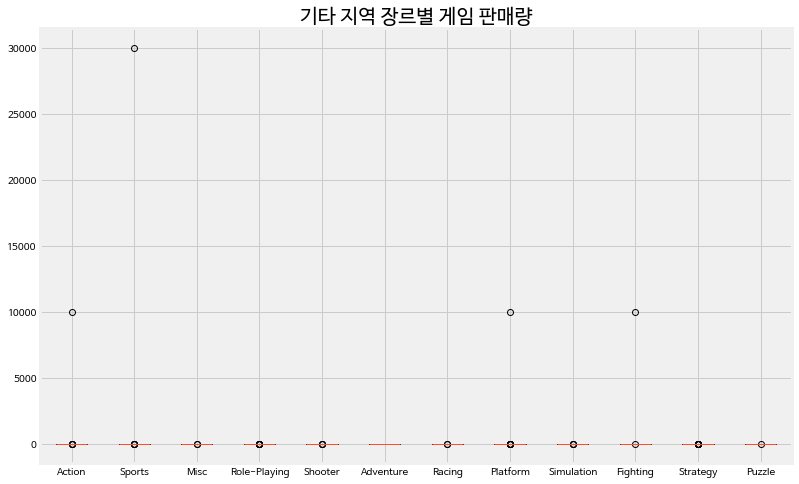

In [ ]:
Other_Genre_Sales = df1[['Genre', 'Other_Sales']]
Other_Genre_Sales = Other_Genre_Sales.reset_index(drop=True)
Other_Genre_Sales = Other_Genre_Sales.set_index('Genre')

Other_Action = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Action']
Other_Adventure = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Adventure']
Other_Fighting = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Fighting']
Other_Misc = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Misc']
Other_Platform = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Platform']
Other_Puzzle = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Puzzle']
Other_Racing = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Racing']
Other_RolePlaying = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Role-Playing']
Other_Shooter = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Shooter']
Other_Simulation = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Simulation']
Other_Sports = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Sports']
Other_Strategy = Other_Genre_Sales.loc[Other_Genre_Sales.index == 'Strategy']

fig = plt.figure(figsize=(12, 8))
plot_data = [Other_Action, Other_Adventure, Other_Fighting, Other_Misc, Other_Platform, Other_Puzzle, Other_Racing, Other_RolePlaying, Other_Shooter, Other_Simulation, Other_Sports, Other_Strategy]
ax = plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], genre)
plt.title('기타 지역 장르별 게임 판매량', fontsize=20)
plt.show()

In [ ]:
# 장르별 판매량의 평균 차이 분석
# the "C" indicates categorical data
model = ols('total_sales ~ C(Genre)', df1).fit()

anova_lm(model)
total_pval = anova_lm(model).at['C(Genre)', 'PR(>F)']

if total_pval < 0.05:
  print("장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타난다.", total_pval)
else:
  print("장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다.", total_pval)

장르별 판매량의 평균 사이에는 통계적으로 유의미한 차이가 나타나지 않는다. 0.6631250503096588


**지역 간 선호 장르 차이 분석**

In [ ]:
df_Genre = df1

Other_Genre_Sales = df1[['Genre', 'Other_Sales']]
Other_Genre_Sales = Other_Genre_Sales.reset_index(drop=True)
Other_Genre_Sales = Other_Genre_Sales.set_index('Genre')

In [ ]:
# 지역 간 장르 차이 비교
df_Action = df1.loc[df1['Genre'] == 'Action']
df_Adventure = df1.loc[df1['Genre'] == 'Adventure']
df_Fighting = df1.loc[df1['Genre'] == 'Fighting']
df_Misc = df1.loc[df1['Genre'] == 'Misc']
df_Platform = df1.loc[df1['Genre'] == 'Platform']
df_Puzzle = df1.loc[df1['Genre'] == 'Puzzle']
df_Racing = df1.loc[df1['Genre'] == 'Racing']
df_Role = df1.loc[df1['Genre'] == 'Role-Playing']
df_Shooter = df1.loc[df1['Genre'] == 'Shooter']
df_Simulation = df1.loc[df1['Genre'] == 'Simulation']
df_Sports = df1.loc[df1['Genre'] == 'Sports']
df_Strategy = df1.loc[df1['Genre'] == 'Strategy']

In [ ]:
# Action 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Action['NA_Sales'], df_Action['EU_Sales'], df_Action['JP_Sales'], df_Action['Other_Sales'])

print('Action 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Adventure 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Adventure['NA_Sales'], df_Adventure['EU_Sales'], df_Adventure['JP_Sales'], df_Adventure['Other_Sales'])

print('Adventure 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Fighting 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Fighting['NA_Sales'], df_Fighting['EU_Sales'], df_Fighting['JP_Sales'], df_Fighting['Other_Sales'])

print('Fighting 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Misc 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Misc['NA_Sales'], df_Misc['EU_Sales'], df_Misc['JP_Sales'], df_Misc['Other_Sales'])

print('Misc 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Action 장르 데이터의 지역별 일원분산분석 결과 : F=1.1, p=0.33684
Adventure 장르 데이터의 지역별 일원분산분석 결과 : F=1.0, p=0.39513
Fighting 장르 데이터의 지역별 일원분산분석 결과 : F=0.9, p=0.47203
Misc 장르 데이터의 지역별 일원분산분석 결과 : F=1.4, p=0.26019


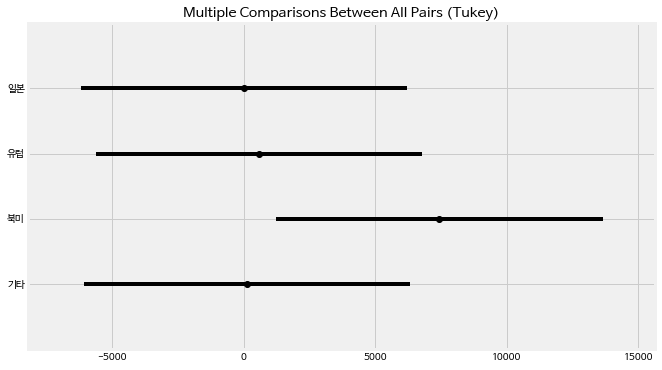

In [ ]:
df_Action_NA = pd.DataFrame(df_Action['NA_Sales'])
df_Action_EU = pd.DataFrame(df_Action['EU_Sales'])
df_Action_JP = pd.DataFrame(df_Action['JP_Sales'])
df_Action_Other = pd.DataFrame(df_Action['Other_Sales'])

df_Action_NA = df_Action_NA.reset_index(drop=True)
df_Action_NA['Area'] = '북미'
df_Action_NA = df_Action_NA.rename(columns={'NA_Sales':'Sales'})

df_Action_EU = df_Action_EU.reset_index(drop=True)
df_Action_EU['Area'] = '유럽'
df_Action_EU = df_Action_EU.rename(columns={'EU_Sales':'Sales'})

df_Action_JP = df_Action_JP.reset_index(drop=True)
df_Action_JP['Area'] = '일본'
df_Action_JP = df_Action_JP.rename(columns={'JP_Sales':'Sales'})

df_Action_Other = df_Action_Other.reset_index(drop=True)
df_Action_Other['Area'] = '기타'
df_Action_Other = df_Action_Other.rename(columns={'Other_Sales':'Sales'})

df_Action_Compare = pd.concat([df_Action_NA, df_Action_EU, df_Action_JP, df_Action_Other])
df_Action_Compare

# 사후 검정 : Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_Action_Compare['Sales'], df_Action_Compare['Area'], alpha=0.05)
fig = posthoc.plot_simultaneous()

In [ ]:
# Platform 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Platform['NA_Sales'], df_Platform['EU_Sales'], df_Platform['JP_Sales'], df_Platform['Other_Sales'])

print('Platform 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Puzzle 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Puzzle['NA_Sales'], df_Puzzle['EU_Sales'], df_Puzzle['JP_Sales'], df_Puzzle['Other_Sales'])

print('Puzzle 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Racing 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Racing['NA_Sales'], df_Racing['EU_Sales'], df_Racing['JP_Sales'], df_Racing['Other_Sales'])

print('Racing 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Role-playing 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Role['NA_Sales'], df_Role['EU_Sales'], df_Role['JP_Sales'], df_Role['Other_Sales'])

print('Role-playing 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Platform 장르 데이터의 지역별 일원분산분석 결과 : F=4.0, p=0.00908
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
Puzzle 장르 데이터의 지역별 일원분산분석 결과 : F=2.1, p=0.11641
Racing 장르 데이터의 지역별 일원분산분석 결과 : F=0.7, p=0.55408
Role-playing 장르 데이터의 지역별 일원분산분석 결과 : F=1.0, p=0.39506


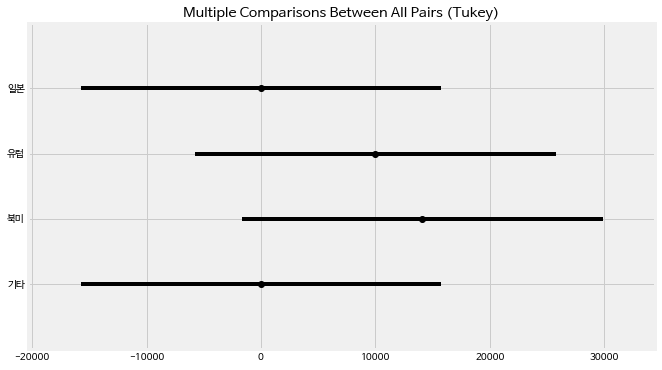

In [ ]:
df_Racing_NA = pd.DataFrame(df_Racing['NA_Sales'])
df_Racing_EU = pd.DataFrame(df_Racing['EU_Sales'])
df_Racing_JP = pd.DataFrame(df_Racing['JP_Sales'])
df_Racing_Other = pd.DataFrame(df_Racing['Other_Sales'])

df_Racing_NA = df_Racing_NA.reset_index(drop=True)
df_Racing_NA['Area'] = '북미'
df_Racing_NA = df_Racing_NA.rename(columns={'NA_Sales':'Sales'})

df_Racing_EU = df_Racing_EU.reset_index(drop=True)
df_Racing_EU['Area'] = '유럽'
df_Racing_EU = df_Racing_EU.rename(columns={'EU_Sales':'Sales'})

df_Racing_JP = df_Racing_JP.reset_index(drop=True)
df_Racing_JP['Area'] = '일본'
df_Racing_JP = df_Racing_JP.rename(columns={'JP_Sales':'Sales'})

df_Racing_Other = df_Racing_Other.reset_index(drop=True)
df_Racing_Other['Area'] = '기타'
df_Racing_Other = df_Racing_Other.rename(columns={'Other_Sales':'Sales'})

df_Racing_Compare = pd.concat([df_Racing_NA, df_Racing_EU, df_Racing_JP, df_Racing_Other])
df_Racing_Compare

# 사후 검정 : Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_Racing_Compare['Sales'], df_Racing_Compare['Area'], alpha=0.05)
fig = posthoc.plot_simultaneous()

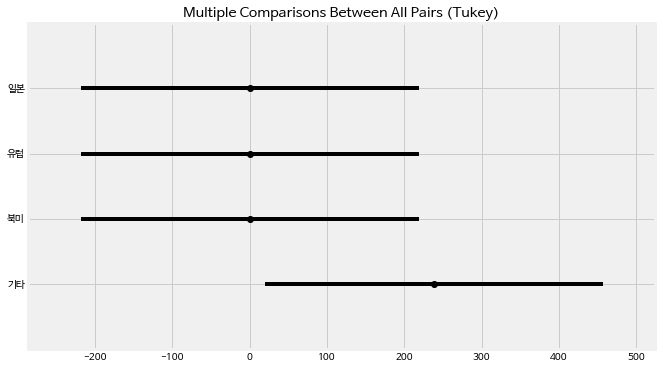

In [ ]:
df_Role_NA = pd.DataFrame(df_Role['NA_Sales'])
df_Role_EU = pd.DataFrame(df_Role['EU_Sales'])
df_Role_JP = pd.DataFrame(df_Role['JP_Sales'])
df_Role_Other = pd.DataFrame(df_Role['Other_Sales'])

df_Role_NA = df_Role_NA.reset_index(drop=True)
df_Role_NA['Area'] = '북미'
df_Role_NA = df_Role_NA.rename(columns={'NA_Sales':'Sales'})

df_Role_EU = df_Role_EU.reset_index(drop=True)
df_Role_EU['Area'] = '유럽'
df_Role_EU = df_Role_EU.rename(columns={'EU_Sales':'Sales'})

df_Role_JP = df_Role_JP.reset_index(drop=True)
df_Role_JP['Area'] = '일본'
df_Role_JP = df_Role_JP.rename(columns={'JP_Sales':'Sales'})

df_Role_Other = df_Role_Other.reset_index(drop=True)
df_Role_Other['Area'] = '기타'
df_Role_Other = df_Role_Other.rename(columns={'Other_Sales':'Sales'})

df_Role_Compare = pd.concat([df_Role_NA, df_Role_EU, df_Role_JP, df_Role_Other])
df_Role_Compare

# 사후 검정 : Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_Role_Compare['Sales'], df_Role_Compare['Area'], alpha=0.05)
fig = posthoc.plot_simultaneous()

In [ ]:
# Shooter 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Shooter['NA_Sales'], df_Shooter['EU_Sales'], df_Shooter['JP_Sales'], df_Shooter['Other_Sales'])

print('Shooter 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Simulation 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Simulation['NA_Sales'], df_Simulation['EU_Sales'], df_Simulation['JP_Sales'], df_Simulation['Other_Sales'])

print('Simulation 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Spports 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Sports['NA_Sales'], df_Sports['EU_Sales'], df_Sports['JP_Sales'], df_Sports['Other_Sales'])

print('Sports 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


# Strategy 장르의 판매량 평균 비교
F_statistic, pVal = stats.f_oneway(df_Strategy['NA_Sales'], df_Strategy['EU_Sales'], df_Strategy['JP_Sales'], df_Strategy['Other_Sales'])

print('Strategy 장르 데이터의 지역별 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Shooter 장르 데이터의 지역별 일원분산분석 결과 : F=1.0, p=0.39445
Simulation 장르 데이터의 지역별 일원분산분석 결과 : F=1.0, p=0.39699
Sports 장르 데이터의 지역별 일원분산분석 결과 : F=8.4, p=0.00002
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
Strategy 장르 데이터의 지역별 일원분산분석 결과 : F=1.0, p=0.39682


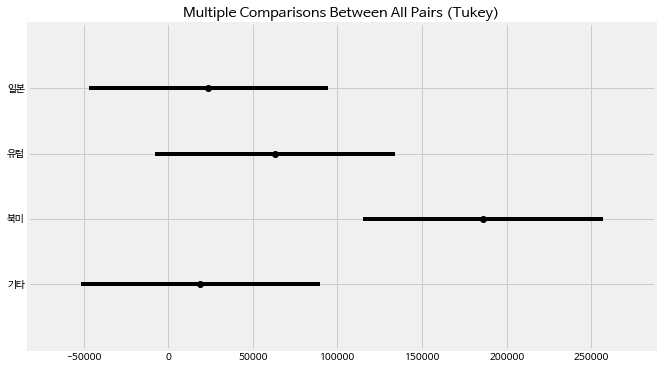

In [ ]:
df_Sports_NA = pd.DataFrame(df_Sports['NA_Sales'])
df_Sports_EU = pd.DataFrame(df_Sports['EU_Sales'])
df_Sports_JP = pd.DataFrame(df_Sports['JP_Sales'])
df_Sports_Other = pd.DataFrame(df_Sports['Other_Sales'])

df_Sports_NA = df_Sports_NA.reset_index(drop=True)
df_Sports_NA['Area'] = '북미'
df_Sports_NA = df_Sports_NA.rename(columns={'NA_Sales':'Sales'})

df_Sports_EU = df_Sports_EU.reset_index(drop=True)
df_Sports_EU['Area'] = '유럽'
df_Sports_EU = df_Sports_EU.rename(columns={'EU_Sales':'Sales'})

df_Sports_JP = df_Sports_JP.reset_index(drop=True)
df_Sports_JP['Area'] = '일본'
df_Sports_JP = df_Sports_JP.rename(columns={'JP_Sales':'Sales'})

df_Sports_Other = df_Sports_Other.reset_index(drop=True)
df_Sports_Other['Area'] = '기타'
df_Sports_Other = df_Sports_Other.rename(columns={'Other_Sales':'Sales'})

df_Sports_Compare = pd.concat([df_Sports_NA, df_Sports_EU, df_Sports_JP, df_Sports_Other])
df_Sports_Compare

# 사후 검정 : Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_Sports_Compare['Sales'], df_Sports_Compare['Area'], alpha=0.05)
fig = posthoc.plot_simultaneous()

**분석 결과**

1) 지역 내 분석:

지역 내 장르 판매량의 평균 차이는 일본을 제외하고는 통계적으로 유의미한 차이가 나타나지 않는다.

2) 지역 간 분석:

Action, Racing, Role-Playing, Sports 장르는 지역 별 평균에서 통계적으로 유의미한 차이가 나타난다. 

# 연도별 게임 트랜드 변화

# 연도 별 발매량

In [ ]:
# 연도에 따른 장르별 발매량 변화: 1980 - 
# outlier 값 제거한 data 사용
years = df1['5Years'].value_counts().index.tolist()
years.sort()
years

[1993, 1998, 2003, 2008, 2013]

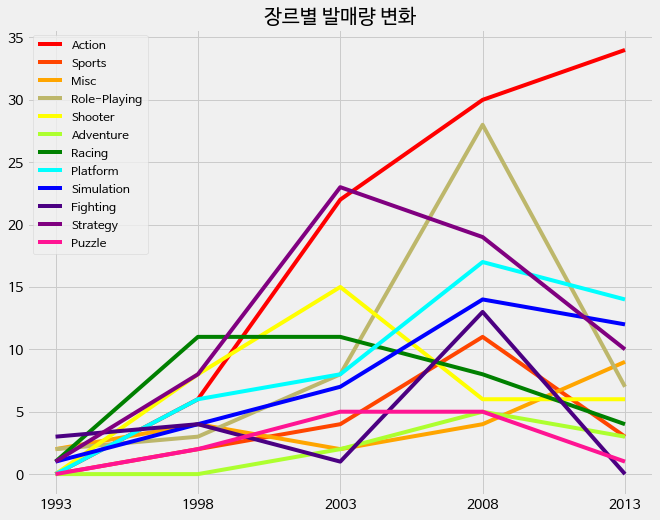

In [ ]:
df_genre_size_trend = pd.crosstab(df1['5Years'], df1['Genre'])
df_genre_size_trend

plt.figure(figsize=(10, 8))

plt.plot(years, df_genre_size_trend['Action'], color='red')
plt.plot(years, df_genre_size_trend['Adventure'], color='orangered')
plt.plot(years, df_genre_size_trend['Fighting'], color='orange')
plt.plot(years, df_genre_size_trend['Misc'], color='darkkhaki')
plt.plot(years, df_genre_size_trend['Platform'], color='yellow')
plt.plot(years, df_genre_size_trend['Puzzle'], color='greenyellow')
plt.plot(years, df_genre_size_trend['Racing'], color='green')
plt.plot(years, df_genre_size_trend['Role-Playing'], color='aqua')
plt.plot(years, df_genre_size_trend['Shooter'], color='blue')
plt.plot(years, df_genre_size_trend['Simulation'], color='indigo')
plt.plot(years, df_genre_size_trend['Sports'], color='purple')
plt.plot(years, df_genre_size_trend['Strategy'], color='deeppink')

plt.title('장르별 발매량 변화', fontsize=20)
plt.xticks(years)
plt.legend(genre, fontsize=12)

plt.show()

장르 별 발매량은 Action 장르가 뚜렷한 증가세를 보이고 있는 것을 확인할 수 있다.
Fighting 장르는 2000년대 전후로 급속히 증가하다가 2010년대 들어서면서 급속히 하락하고 있는 모습을 보이고 있다.
2000년대 초반까지 가장 많은 양을 차지하고 있던 simulation 장르 또한 2000년대 중반 이후 하락세를 보이고 있다.
Action 장르를 제외하고는 전반적으로 하락하는 흐름을 보이고 있는 가운데, Misc 장르만 2010년대 이후로 거의 유일하게 증가하고 있는 것을 확인할 수 있다.

In [ ]:
# 플랫폼에서는 발매작이 10개 이하인 플랫폼을 제거하고 살펴볼 것이다. 

df_platform = df1
df_platform = df_platform.loc[(df_platform['Platform'] != 'GB') & 
                              (df_platform['Platform'] !='GEN') &
                              (df_platform['Platform'] != 'PSV') &
                              (df_platform['Platform'] !='SAT') &
                              (df_platform['Platform'] !='SNES') &
                              (df_platform['Platform'] !='WiiU') &
                              (df_platform['Platform'] !='XOne') &
                              (df_platform['Platform'] !='Platform')]

In [ ]:
platform1 = df_platform['Platform'].value_counts().index.tolist() 
platform1.sort()

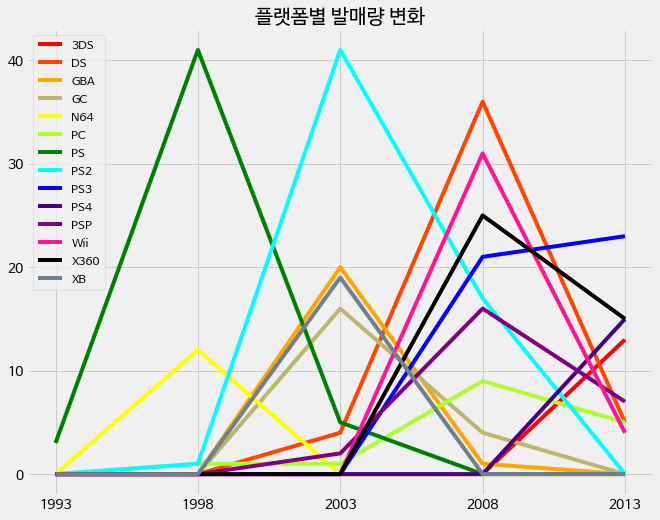

In [ ]:
# 연도별 플랫폼 트랜드

df_platform_size_trend = pd.crosstab(df_platform['5Years'], df_platform['Platform'])
df_platform_size_trend

plt.figure(figsize=(10, 8))

plt.plot(years, df_platform_size_trend['3DS'], color='red')
plt.plot(years, df_platform_size_trend['DS'], color='orangered')
plt.plot(years, df_platform_size_trend['GBA'], color='orange')
plt.plot(years, df_platform_size_trend['GC'], color='darkkhaki')
plt.plot(years, df_platform_size_trend['N64'], color='yellow')
plt.plot(years, df_platform_size_trend['PC'], color='greenyellow')
plt.plot(years, df_platform_size_trend['PS'], color='green')
plt.plot(years, df_platform_size_trend['PS2'], color='aqua')
plt.plot(years, df_platform_size_trend['PS3'], color='blue')
plt.plot(years, df_platform_size_trend['PS4'], color='indigo')
plt.plot(years, df_platform_size_trend['PSP'], color='purple')
plt.plot(years, df_platform_size_trend['Wii'], color='deeppink')
plt.plot(years, df_platform_size_trend['X360'], color='black')
plt.plot(years, df_platform_size_trend['XB'], color='slategray')

plt.title('플랫폼별 발매량 변화', fontsize=20)
plt.xticks(years)
plt.legend(platform1, fontsize=12)

plt.show()

PS3를 플랫폼으로 하는 게임의 발매가 강세임.  (성장세는 둔화)
3DS, PS4도 증가.
X360은 높은 축에 속하지만, 감소세. 
나머지는 전반적으로 감소세.
플랫폼 발매량은 플랫폼의 세대 교체에 따라 변화되고 있음을 확인할 수 있다.

In [ ]:
df_platform
df_platform_size_year_trend = pd.crosstab(df_platform['Year'], df_platform['Platform'])
df_platform_size_year_trend

year = df1['Year'].value_counts().index.tolist()
year.sort()
year = year[2:]

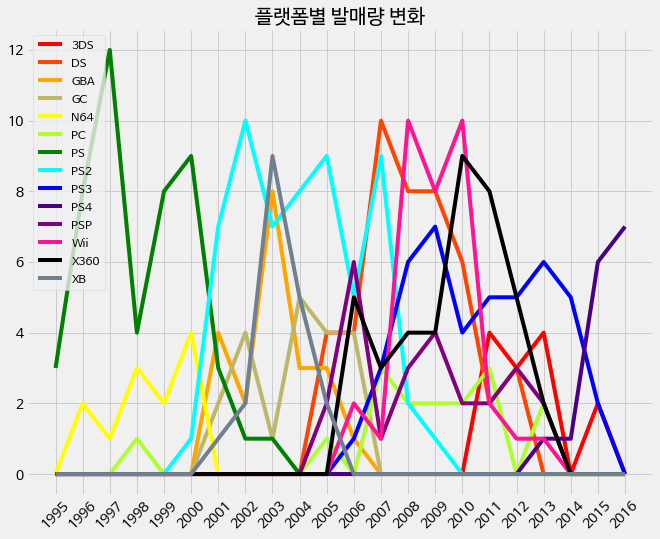

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(year, df_platform_size_year_trend['3DS'], color='red')
plt.plot(year, df_platform_size_year_trend['DS'], color='orangered')
plt.plot(year, df_platform_size_year_trend['GBA'], color='orange')
plt.plot(year, df_platform_size_year_trend['GC'], color='darkkhaki')
plt.plot(year, df_platform_size_year_trend['N64'], color='yellow')
plt.plot(year, df_platform_size_year_trend['PC'], color='greenyellow')
plt.plot(year, df_platform_size_year_trend['PS'], color='green')
plt.plot(year, df_platform_size_year_trend['PS2'], color='aqua')
plt.plot(year, df_platform_size_year_trend['PS3'], color='blue')
plt.plot(year, df_platform_size_year_trend['PS4'], color='indigo')
plt.plot(year, df_platform_size_year_trend['PSP'], color='purple')
plt.plot(year, df_platform_size_year_trend['Wii'], color='deeppink')
plt.plot(year, df_platform_size_year_trend['X360'], color='black')
plt.plot(year, df_platform_size_year_trend['XB'], color='slategray')

plt.title('플랫폼별 발매량 변화', fontsize=20)
plt.xticks(year, rotation=45)
plt.legend(platform1, fontsize=12)

plt.show()

# 연도 별 판매량

In [ ]:
# 연도 별 장르 판매량의 변화 

df_genre_sale_trend = df1[['5Years', 'Genre', 'total_sales']]
df_genre_sale_trend = df_genre_sale_trend[df_genre_sale_trend.total_sales > 0].groupby(['5Years', 'Genre']).sum()

midx = pd.MultiIndex.from_product([years, genre], names=['5Years', 'Genre'])
df_genre_sale_trend = df_genre_sale_trend.reindex(midx, fill_value=0).unstack()
df_genre_sale_trend

total_sales                                                            \
Genre        Action  Adventure    Fighting        Misc    Platform     Puzzle   
5Years                                                                          
1993           0.00       0.00  1110001.90   190000.00        0.00       0.00   
1998     5010010.92  240003.21  1690004.12   130000.25  3820011.88       0.00   
2003     3340006.35  400000.66   240004.04  1320001.54  5930010.25   20000.18   
2008     6640016.18  570001.90   120001.27  5440007.79  1430003.59  390002.17   
2013    16180018.20  100000.05  1460002.35   710001.19  2260005.22   60000.08   

                                                                     \
Genre       Racing Role-Playing     Shooter  Simulation      Sports   
5Years                                                                
1993     260000.00         0.00    30000.04   210000.07    60000.00   
1998    8670008.51   7120014.99   810000.80  1350000.36  1890002.49   
2003    2930002.94   4100010.39   670001.16    30001.87  4500008.65   
2008     840004.54   3500009.24  8850008.12  4110005.19  5860009.70   
2013    1990002.57   1890008.31  7690014.54        0.00  5480012.31   

                    
Genre     Strategy  
5Years              
1993          0.00  
1998     880000.05  
2003     240001.21  
2008     390000.62  
2013    1010000.65

In [ ]:
years

[1993, 1998, 2003, 2008, 2013]

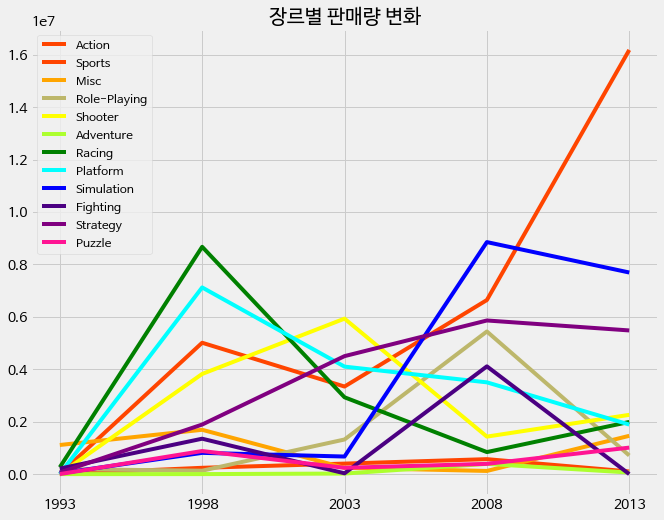

In [ ]:
# 그래프 그리기

plt.figure(figsize=(10, 8))

plt.plot(years, df_genre_sale_trend['total_sales','Action'], color='orangered')
plt.plot(years, df_genre_sale_trend['total_sales','Adventure'], color='orangered')
plt.plot(years, df_genre_sale_trend['total_sales','Fighting'], color='orange')
plt.plot(years, df_genre_sale_trend['total_sales','Misc'], color='darkkhaki')
plt.plot(years, df_genre_sale_trend['total_sales','Platform'], color='yellow')
plt.plot(years, df_genre_sale_trend['total_sales','Puzzle'], color='greenyellow')
plt.plot(years, df_genre_sale_trend['total_sales','Racing'], color='green')
plt.plot(years, df_genre_sale_trend['total_sales','Role-Playing'], color='aqua')
plt.plot(years, df_genre_sale_trend['total_sales','Shooter'], color='blue')
plt.plot(years, df_genre_sale_trend['total_sales','Simulation'], color='indigo')
plt.plot(years, df_genre_sale_trend['total_sales','Sports'], color='purple')
plt.plot(years, df_genre_sale_trend['total_sales','Strategy'], color='deeppink')

plt.title('장르별 판매량 변화', fontsize=20)
plt.xticks(years)
plt.legend(genre, fontsize=12)

plt.show()

In [ ]:
# 연도별 게임- 플랫폼 판매량 변화

df_platform_sale_trend = df1[['5Years', 'Platform', 'total_sales']]
df_platform_sale_trend = df_platform_sale_trend[df_platform_sale_trend.total_sales > 0].groupby(['5Years', 'Platform']).sum()

midx = pd.MultiIndex.from_product([years, platform1], names=['5Years', 'Platform'])
df_platform_sale_trend = df_platform_sale_trend.reindex(midx, fill_value=0).unstack()
df_platform_sale_trend


total_sales                                                  \
Platform         3DS          DS         GBA         GC          N64   
5Years                                                                 
1993            0.00        0.00        0.00       0.00         0.00   
1998            0.00        0.00        0.00       0.00  14490020.07   
2003            0.00   280004.03  8980014.19  880004.08         0.00   
2008            0.00  6810009.41    10000.26  280001.04         0.00   
2013      1450004.61   990000.60        0.00       0.00         0.00   

                                                                        \
Platform          PC           PS          PS2         PS3         PS4   
5Years                                                                   
1993            0.00     80000.11         0.00        0.00        0.00   
1998        20000.02  13680025.26    100000.71        0.00        0.00   
2003        20000.28   1100001.62  10440021.61        0.00        0.00   
2008      1050001.38         0.00   1980005.64  5980014.94        0.00   
2013      1150001.06         0.00         0.00  6710014.35  3520013.89   

                                                           
Platform         PSP         Wii         X360          XB  
5Years                                                     
1993            0.00        0.00         0.00        0.00  
1998            0.00        0.00         0.00        0.00  
2003        20000.18        0.00         0.00  2000003.25  
2008      1380003.08  8100013.58  12550020.98        0.00  
2013       290000.21   660001.30  18000018.81        0.00

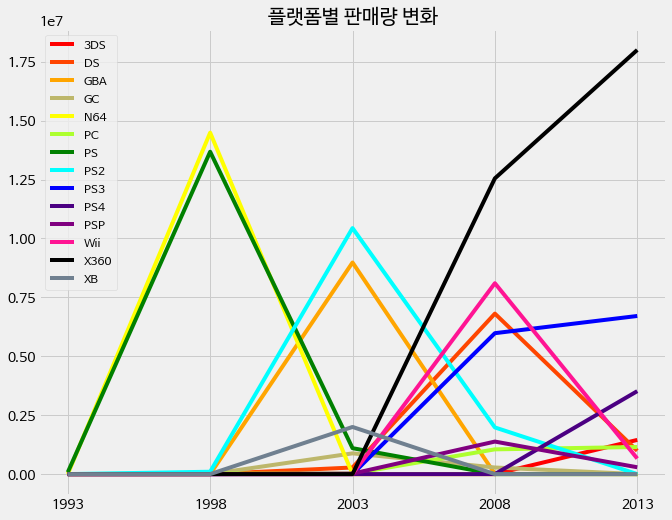

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(years, df_platform_sale_trend['total_sales', '3DS'], color='red')
plt.plot(years, df_platform_sale_trend['total_sales', 'DS'], color='orangered')
plt.plot(years, df_platform_sale_trend['total_sales', 'GBA'], color='orange')
plt.plot(years, df_platform_sale_trend['total_sales', 'GC'], color='darkkhaki')
plt.plot(years, df_platform_sale_trend['total_sales', 'N64'], color='yellow')
plt.plot(years, df_platform_sale_trend['total_sales', 'PC'], color='greenyellow')
plt.plot(years, df_platform_sale_trend['total_sales', 'PS'], color='green')
plt.plot(years, df_platform_sale_trend['total_sales', 'PS2'], color='aqua')
plt.plot(years, df_platform_sale_trend['total_sales', 'PS3'], color='blue')
plt.plot(years, df_platform_sale_trend['total_sales', 'PS4'], color='indigo')
plt.plot(years, df_platform_sale_trend['total_sales', 'PSP'], color='purple')
plt.plot(years, df_platform_sale_trend['total_sales', 'Wii'], color='deeppink')
plt.plot(years, df_platform_sale_trend['total_sales', 'X360'], color='black')
plt.plot(years, df_platform_sale_trend['total_sales', 'XB'], color='slategray')

plt.title('플랫폼별 판매량 변화', fontsize=20)
plt.xticks(years)
plt.legend(platform1, fontsize=12)

plt.show()

In [ ]:
year = df1['Year'].value_counts().index.tolist()
year.sort()

df_platform_sale_trend2 = df1[['Year', 'Platform', 'total_sales']]
df_platform_sale_trend2 = df_platform_sale_trend2[df_platform_sale_trend2.total_sales > 0].groupby(['Year', 'Platform']).sum()

midx = pd.MultiIndex.from_product([year, platform1], names=['Year', 'Platform'])
df_platform_sale_trend2 = df_platform_sale_trend2.reindex(midx, fill_value=0).unstack()
df_platform_sale_trend2


total_sales                                                 \
Platform         3DS          DS         GBA         GC         N64   
Year                                                                  
1991            0.00        0.00        0.00       0.00        0.00   
1994            0.00        0.00        0.00       0.00        0.00   
1995            0.00        0.00        0.00       0.00        0.00   
1996            0.00        0.00        0.00       0.00  8400013.37   
1997            0.00        0.00        0.00       0.00    50000.20   
1998            0.00        0.00        0.00       0.00  4150004.09   
1999            0.00        0.00        0.00       0.00   110000.44   
2000            0.00        0.00        0.00       0.00  1780001.97   
2001            0.00        0.00   750001.46   40002.08        0.00   
2002            0.00        0.00  1230000.79  370001.24        0.00   
2003            0.00        0.00  3480003.72   50000.01        0.00   
2004            0.00        0.00  3190007.75  270000.29        0.00   
2005            0.00   280004.03   330000.47  150000.46        0.00   
2006            0.00  1130000.67    10000.26  280001.04        0.00   
2007            0.00  2490003.03        0.00       0.00        0.00   
2008            0.00   830002.06        0.00       0.00        0.00   
2009            0.00  1260002.99        0.00       0.00        0.00   
2010            0.00  1100000.66        0.00       0.00        0.00   
2011       650001.15    40000.14        0.00       0.00        0.00   
2012       110000.64   950000.46        0.00       0.00        0.00   
2013       600002.54        0.00        0.00       0.00        0.00   
2014            0.00        0.00        0.00       0.00        0.00   
2015        90000.28        0.00        0.00       0.00        0.00   
2016            0.00        0.00        0.00       0.00        0.00   

                                                                      \
Platform          PC          PS         PS2         PS3         PS4   
Year                                                                   
1991            0.00        0.00        0.00        0.00        0.00   
1994            0.00        0.00        0.00        0.00        0.00   
1995            0.00    80000.11        0.00        0.00        0.00   
1996            0.00   850003.78        0.00        0.00        0.00   
1997            0.00  2440007.03        0.00        0.00        0.00   
1998        20000.02  1330004.08        0.00        0.00        0.00   
1999            0.00  3460003.89        0.00        0.00        0.00   
2000            0.00  5600006.48   100000.71        0.00        0.00   
2001            0.00   870001.35  5470006.37        0.00        0.00   
2002            0.00    80000.01  1240002.92        0.00        0.00   
2003            0.00   150000.26  1730004.64        0.00        0.00   
2004            0.00        0.00  1120006.94        0.00        0.00   
2005        20000.28        0.00   880000.74        0.00        0.00   
2006            0.00        0.00   460002.49   300000.08        0.00   
2007        50000.44        0.00  1090001.79   750001.37        0.00   
2008       100000.48        0.00   390001.22  2160004.93        0.00   
2009       830000.11        0.00    40000.14  2240006.77        0.00   
2010        70000.35        0.00        0.00   530001.79        0.00   
2011        80000.04        0.00        0.00  1860002.03        0.00   
2012            0.00        0.00        0.00  2810005.99        0.00   
2013      1070001.02        0.00        0.00  1100004.33  1780001.85   
2014            0.00        0.00        0.00   860001.73    50000.10   
2015            0.00        0.00        0.00    80000.27  1250007.05   
2016            0.00        0.00        0.00        0.00   440004.89   

                                                         
Platform        PSP         Wii         X360         XB  
Year                          

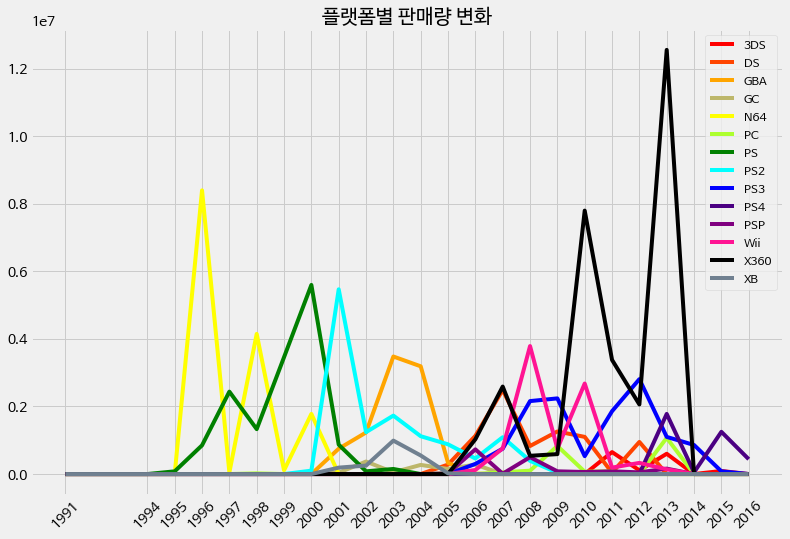

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(year, df_platform_sale_trend2['total_sales', '3DS'], color='red')
plt.plot(year, df_platform_sale_trend2['total_sales', 'DS'], color='orangered')
plt.plot(year, df_platform_sale_trend2['total_sales', 'GBA'], color='orange')
plt.plot(year, df_platform_sale_trend2['total_sales', 'GC'], color='darkkhaki')
plt.plot(year, df_platform_sale_trend2['total_sales', 'N64'], color='yellow')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PC'], color='greenyellow')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PS'], color='green')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PS2'], color='aqua')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PS3'], color='blue')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PS4'], color='indigo')
plt.plot(year, df_platform_sale_trend2['total_sales', 'PSP'], color='purple')
plt.plot(year, df_platform_sale_trend2['total_sales', 'Wii'], color='deeppink')
plt.plot(year, df_platform_sale_trend2['total_sales', 'X360'], color='black')
plt.plot(year, df_platform_sale_trend2['total_sales', 'XB'], color='slategray')

plt.title('플랫폼별 판매량 변화', fontsize=20)
plt.xticks(year, rotation=45)
plt.legend(platform1, fontsize=12)

plt.show()

# 게임사 트랜드 분석

In [ ]:
# publisher

df_publisher = df1
df_publisher = df_publisher.groupby(['Publisher']).filter(lambda g: g['Publisher'].size > 10)

publisher1 = df_publisher['Publisher'].values.tolist()
publisher1 = set(publisher1)
publisher1 = list(publisher1)
publisher1.sort()

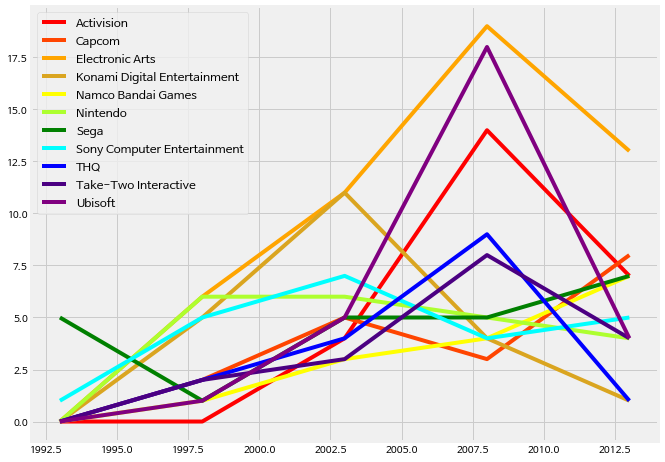

In [ ]:
df_publisher_size_trend = pd.crosstab(df_publisher['5Years'], df_publisher['Publisher'])
df_publisher_size_trend

plt.figure(figsize=(10, 8))

plt.plot(years, df_publisher_size_trend['Activision'], color='red')
plt.plot(years, df_publisher_size_trend['Capcom'], color='orangered')
plt.plot(years, df_publisher_size_trend['Electronic Arts'], color='orange')
plt.plot(years, df_publisher_size_trend['Konami Digital Entertainment'], color='goldenrod')
plt.plot(years, df_publisher_size_trend['Namco Bandai Games'], color='yellow')
plt.plot(years, df_publisher_size_trend['Nintendo'], color='greenyellow')
plt.plot(years, df_publisher_size_trend['Sega'], color='green')
plt.plot(years, df_publisher_size_trend['Sony Computer Entertainment'], color='aqua')
plt.plot(years, df_publisher_size_trend['THQ'], color='blue')
plt.plot(years, df_publisher_size_trend['Take-Two Interactive'], color='indigo')
plt.plot(years, df_publisher_size_trend['Ubisoft'], color='purple')

plt.legend(publisher1, fontsize=12)

plt.show()

In [ ]:
# publisher 별 판매량

df_publisher_sale_trend = df_publisher[['5Years', 'Publisher', 'total_sales']]
df_publisher_sale_trend = df_publisher_sale_trend[df_publisher_sale_trend.total_sales > 0].groupby(['5Years', 'Publisher']).sum()

midx = pd.MultiIndex.from_product([years, publisher1], names=['5Years', 'Publisher'])
df_publisher_sale_trend = df_publisher_sale_trend.reindex(midx, fill_value=0).unstack()
df_publisher_sale_trend

total_sales                              \
Publisher  Activision      Capcom Electronic Arts   
5Years                                              
1993             0.00        0.00            0.00   
1998             0.00   280000.55      1020001.63   
2003       3040002.73   520001.68      3220009.02   
2008       4610005.79   400003.97      4090011.14   
2013       5510007.34  1280003.95      8750018.56   

                                                                        \
Publisher Konami Digital Entertainment Namco Bandai Games     Nintendo   
5Years                                                                   
1993                              0.00               0.00         0.00   
1998                         430001.29          200000.39  16760030.16   
2003                         730001.72          290000.61   6600010.79   
2008                        1300001.67          650000.74   1550003.77   
2013                          30000.31          920004.66   2260005.89   

                                                               \
Publisher        Sega Sony Computer Entertainment         THQ   
5Years                                                          
1993       1540001.90                    10000.07        0.00   
1998        130000.00                  2720003.85  1530005.39   
2003        370003.27                   690001.40   300003.74   
2008       1500003.74                   650001.49  1110003.98   
2013        530001.83                   230001.73   720000.56   

                                            
Publisher Take-Two Interactive     Ubisoft  
5Years                                      
1993                      0.00        0.00  
1998                 830000.66    40000.16  
2003                  50000.60    80000.25  
2008                1140001.71  2380005.77  
2013               11590008.88  2830005.46

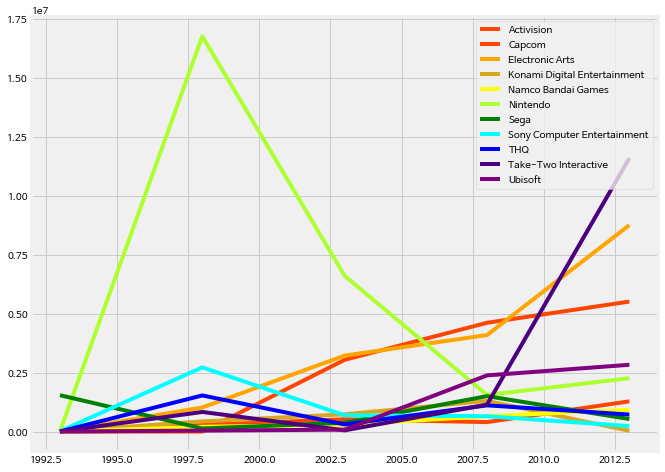

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(years, df_publisher_sale_trend['total_sales','Activision'], color='orangered')
plt.plot(years, df_publisher_sale_trend['total_sales','Capcom'], color='orangered')
plt.plot(years, df_publisher_sale_trend['total_sales','Electronic Arts'], color='orange')
plt.plot(years, df_publisher_sale_trend['total_sales','Konami Digital Entertainment'], color='goldenrod')
plt.plot(years, df_publisher_sale_trend['total_sales','Namco Bandai Games'], color='yellow')
plt.plot(years, df_publisher_sale_trend['total_sales','Nintendo'], color='greenyellow')
plt.plot(years, df_publisher_sale_trend['total_sales','Sega'], color='green')
plt.plot(years, df_publisher_sale_trend['total_sales','Sony Computer Entertainment'], color='aqua')
plt.plot(years, df_publisher_sale_trend['total_sales','THQ'], color='blue')
plt.plot(years, df_publisher_sale_trend['total_sales','Take-Two Interactive'], color='indigo')
plt.plot(years, df_publisher_sale_trend['total_sales','Ubisoft'], color='purple')

plt.legend(publisher1, fontsize=10, loc='upper right')

plt.show()

# 출고량이 높은 게임 분석

Gretz(2010)는 killer application에 초점을 맞춰야 할 것을 강조하였다. 이러한 게임은 게임 콘솔이나 하드웨어 장비들을 사게끔 유도한다.

In [ ]:
# 출고량 top100 작품들의 목록
df_topsales = df1.head(100)

In [ ]:
df_topsales = df_topsales.reset_index(inplace=False)
df_topsales = df_topsales.set_index(['Name', 'Platform', 'Genre', 'Publisher', '5Years'])
df_topsales

,,,,,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,Platform,Genre,Publisher,5Years,,,,,,
Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,2013,9630000.00,5.31,0.06,1.38,9630006.75
Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,2010,7030000.00,1.98,0.08,0.78,7030002.84
Mario Kart 64,N64,Racing,Nintendo,1998,1996,5550000.00,1.94,2.23,0.15,5550004.32
The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,1998,4100000.00,1.89,1.45,0.16,4100003.50
Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,2004,4.34,2.65,3150000.00,0.35,3150007.34
...,...,...,...,...,...,...,...,...,...,...
Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,2010,0.47,280000.00,0.00,0.07,280000.54
Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,2009,280000.00,0.40,0.00,0.09,280000.49
NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,2007,280000.00,0.22,0.00,0.07,280000.29


In [ ]:
# Standard Scaler 적용
from sklearn.preprocessing import StandardScaler 

index_name = df_topsales.index
columns_name = df_topsales.columns

scaler = StandardScaler()
scaler = scaler.fit_transform(df_topsales)
df_topsales_z = pd.DataFrame(scaler, index=index_name, columns=columns_name)

df_topsales_z

,,,,,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,Platform,Genre,Publisher,5Years,,,,,,
Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,1.141936,6.360457,-0.453084,-0.282821,-0.276908,6.065121
Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,0.601588,4.517750,-0.453090,-0.282821,-0.276913,4.212695
Mario Kart 64,N64,Racing,Nintendo,1998,-1.920038,3.468825,-0.453090,-0.282817,-0.276919,3.158240
The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,-1.559806,2.441161,-0.453090,-0.282819,-0.276919,2.125158
Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,-0.479109,-0.464643,-0.453089,5.450037,-0.276917,1.448314
...,...,...,...,...,...,...,...,...,...,...
Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,0.601588,-0.464646,0.005734,-0.282821,-0.276920,-0.596481
Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,0.421472,-0.266201,-0.453092,-0.282821,-0.276920,-0.596481
NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,0.061239,-0.266201,-0.453093,-0.282821,-0.276920,-0.596481


In [ ]:
df_topsales_z = df_topsales_z.reset_index(drop=False)
df_topsales_z = df_topsales_z.set_index(['Name', 'Platform', 'Genre', 'Publisher', '5Years'])
df_topsales_z

,,,,,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,Platform,Genre,Publisher,5Years,,,,,,
Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,1.141936,6.360457,-0.453084,-0.282821,-0.276908,6.065121
Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,0.601588,4.517750,-0.453090,-0.282821,-0.276913,4.212695
Mario Kart 64,N64,Racing,Nintendo,1998,-1.920038,3.468825,-0.453090,-0.282817,-0.276919,3.158240
The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,-1.559806,2.441161,-0.453090,-0.282819,-0.276919,2.125158
Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,-0.479109,-0.464643,-0.453089,5.450037,-0.276917,1.448314
...,...,...,...,...,...,...,...,...,...,...
Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,0.601588,-0.464646,0.005734,-0.282821,-0.276920,-0.596481
Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,0.421472,-0.266201,-0.453092,-0.282821,-0.276920,-0.596481
NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,0.061239,-0.266201,-0.453093,-0.282821,-0.276920,-0.596481


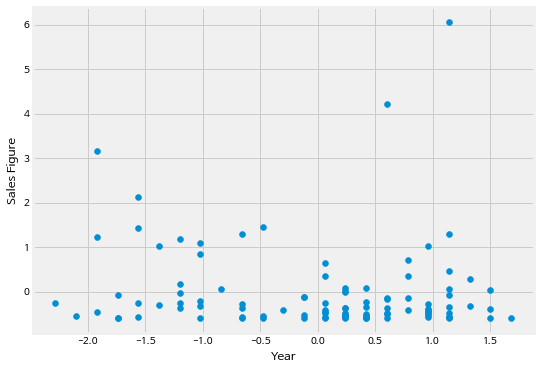

In [ ]:
# scatter plot

df_topsales_z

plt.figure(figsize=(8,6))
plt.scatter(df_topsales_z['Year'], df_topsales_z['total_sales'])
plt.xlabel('Year')
plt.ylabel('Sales Figure')

plt.show()

In [ ]:
df_topsales_z2 = df_topsales_z.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
df_topsales_z2

,,,,,Year,total_sales
Name,Platform,Genre,Publisher,5Years,,
Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,1.141936,6.065121
Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,0.601588,4.212695
Mario Kart 64,N64,Racing,Nintendo,1998,-1.920038,3.158240
The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,-1.559806,2.125158
Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,-0.479109,1.448314
...,...,...,...,...,...,...
Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,0.601588,-0.596481
Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,0.421472,-0.596481
NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,0.061239,-0.596481


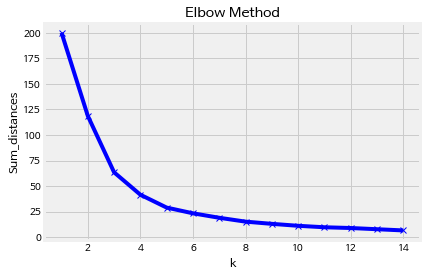

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans 

# k값 결정하기
sum_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_topsales_z2)
    sum_distances.append(km.inertia_)

plt.plot(K, sum_distances, '-bx')
plt.xlabel('k')
plt.ylabel('Sum_distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_topsales_z2)
labels = kmeans.labels_

In [ ]:
new_series = pd.Series(labels)
df_topsales_z2['clusters'] = new_series.values
df_topsales_z2 = df_topsales_z2.rename(columns={'Year': 'Year_z'})
df_topsales_z2['Years'] = df_topsales['Year']
result1 = df_topsales_z2

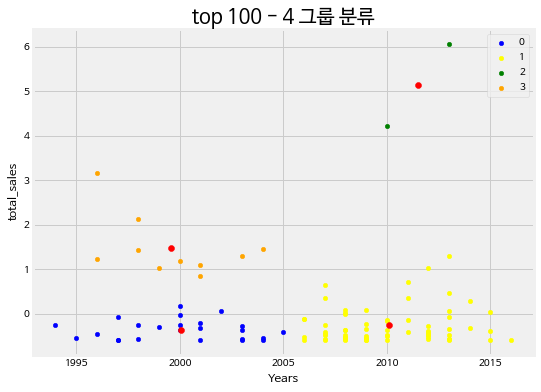

In [ ]:
# scatter plot
from sklearn.datasets import make_blobs

# 중심점 구하기
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(result1, 'clusters')

# x,y의 plot scatter
colors = {0 : 'blue', 1 : 'yellow', 2 : 'green', 3 : 'orange'}
fig, ax = plt.subplots()
grouped = result1.groupby('clusters')
for key, group in grouped:
  group.plot(ax = ax, kind = 'scatter', x = 'Years', y = 'total_sales', label = key, color = colors[key], figsize=(8,6))

# 중심점 표시
plt.scatter(centroids.Years, centroids.total_sales, c='red')

plt.title('top 100 - 4 그룹 분류', fontsize=20)

plt.show()

In [ ]:
result1

,,,,,Year_z,total_sales,clusters,Years
Name,Platform,Genre,Publisher,5Years,,,,
Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,1.141936,6.065121,2,2013
Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,0.601588,4.212695,2,2010
Mario Kart 64,N64,Racing,Nintendo,1998,-1.920038,3.158240,3,1996
The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,-1.559806,2.125158,3,1998
Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,-0.479109,1.448314,3,2004
...,...,...,...,...,...,...,...,...
Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,0.601588,-0.596481,1,2010
Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,0.421472,-0.596481,1,2009
NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,0.061239,-0.596481,1,2007


In [ ]:
condition1 = (result1['clusters'] == 0)
condition2 = (result1['clusters'] == 1)
condition3 = (result1['clusters'] == 2)
condition4 = (result1['clusters'] == 3)

cluster0 = result1[condition1].reset_index(drop=False)
cluster1 = result1[condition2].reset_index(drop=False)
cluster2 = result1[condition3].reset_index(drop=False)
cluster3 = result1[condition4].reset_index(drop=False)

In [ ]:
cluster3

,Name,Platform,Genre,Publisher,5Years,Year_z,total_sales,clusters,Years
0,Mario Kart 64,N64,Racing,Nintendo,1998,-1.920038,3.158240,3,1996
1,The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,1998,-1.559806,2.125158,3,1998
2,Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2003,-0.479109,1.448314,3,2004
3,Pokémon Yellow: Special Pikachu Edition,GB,Role-Playing,Nintendo,1998,-1.559806,1.426943,3,1998
4,Super Mario Bros. 3,GBA,Platform,Nintendo,2003,-0.659225,1.291567,3,2003
5,Super Mario 64,N64,Platform,Nintendo,1998,-1.920038,1.234574,3,1996
6,Final Fantasy IX,PS,Role-Playing,SquareSoft,1998,-1.199574,1.184696,3,2000
7,Tony Hawk's Pro Skater 3,PS2,Sports,Activision,2003,-1.019457,1.099199,3,2001
8,Crash Team Racing,PS,Racing,Sony Computer Entertainment,1998,-1.379690,1.035077,3,1999
9,Crash Bandicoot: The Wrath of Cortex,PS2,Platform,Universal Interactive,2003,-1.019457,0.835586,3,2001


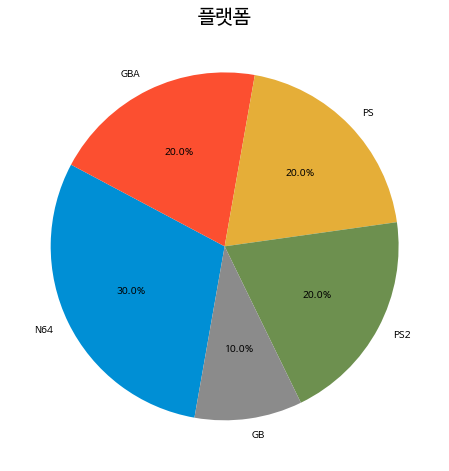

In [ ]:
label_cluster3 = ['N64', 'GBA', 'PS', 'PS2', 'GB']
ratio_cluster3 = cluster3['Platform'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster3, labels=label_cluster3, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('플랫폼', fontsize=20)

plt.show()

In [ ]:
cluster3['Publisher'].value_counts().values.tolist()

[6, 1, 1, 1, 1]

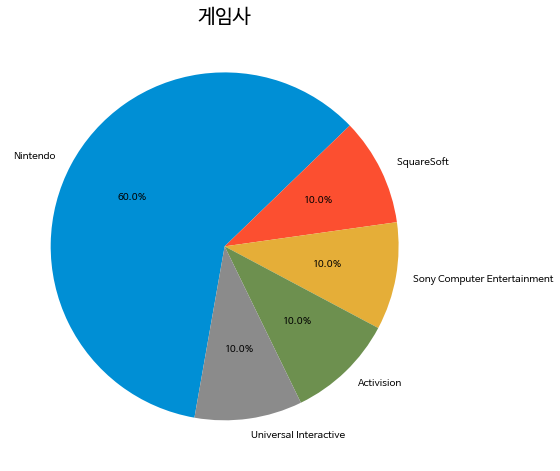

In [ ]:
label_cluster3_2 = ['Nintendo', 'SquareSoft	', 'Sony Computer Entertainment', 'Activision', 'Universal Interactive	']
ratio_cluster3_2 = cluster3['Publisher'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster3_2, labels=label_cluster3_2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('게임사', fontsize=20)

plt.show()

In [ ]:
cluster0

,,,,,Year_z,total_sales,clusters,Years
Name,Platform,Genre,Publisher,5Years,,,,
WWF SmackDown!,PS,Fighting,THQ,1998,-1.199574,0.165864,0,2000
Harry Potter and the Chamber of Secrets,GBA,Action,Electronic Arts,2003,-0.839341,0.066117,0,2002
Mario Tennis,N64,Sports,Nintendo,1998,-1.199574,-0.040754,0,2000
Densha De Go!,PS,Simulation,Taito,1998,-1.739922,-0.069253,0,1997
Ford Racing,PS,Racing,Empire Interactive,2003,-1.019457,-0.218872,0,2001
Duke Nukem: Time to Kill,PS,Shooter,Take-Two Interactive,1998,-1.559806,-0.247370,0,1998
Virtua Fighter,SAT,Fighting,Sega,1993,-2.280271,-0.247371,0,1994
Super Robot Taisen α,PS,Strategy,Banpresto,1998,-1.199574,-0.261620,0,2000
Midway Arcade Treasures,PS2,Misc,Midway Games,2003,-0.659225,-0.282994,0,2003


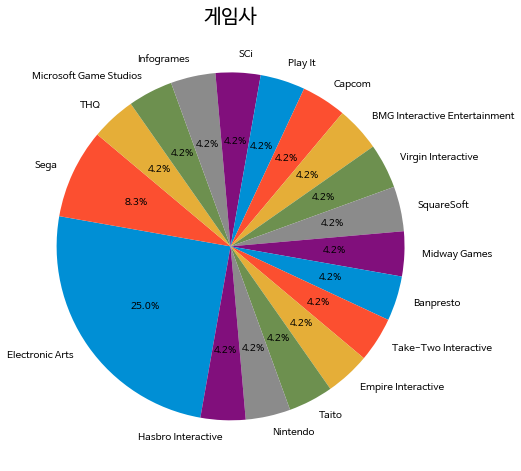

In [ ]:
label_cluster0 = cluster0['Publisher'].value_counts().index.tolist()
ratio_cluster0 = cluster0['Publisher'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster0, labels=label_cluster0, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('게임사', fontsize=20)

plt.show()

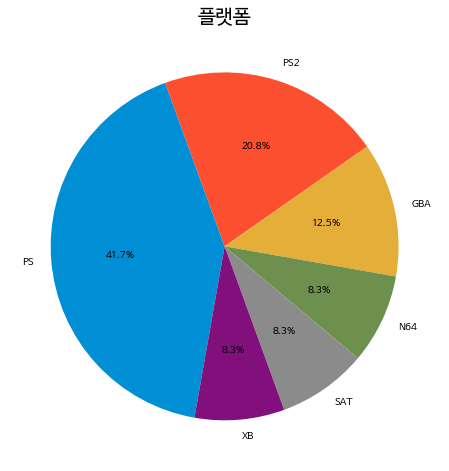

In [ ]:
label_cluster0_2 = cluster0['Platform'].value_counts().index.tolist()
ratio_cluster0_2 = cluster0['Platform'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster0_2, labels=label_cluster0_2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('플랫폼', fontsize=20)

plt.show()

In [ ]:
cluster2

,Name,Platform,Genre,Publisher,5Years,Year_z,total_sales,clusters,Years
0,Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,1.141936,6.065121,2,2013
1,Halo: Reach,X360,Shooter,Microsoft Game Studios,2008,0.601588,4.212695,2,2010


In [ ]:
cluster1

,Name,Platform,Genre,Publisher,5Years,Year_z,total_sales,clusters,Years
0,FIFA 14,X360,Sports,Electronic Arts,2013,1.141936,1.291566,1,2013
1,Assassin's Creed III,PS3,Action,Ubisoft,2013,0.961820,1.027954,1,2012
2,Battlefield 3,X360,Shooter,Electronic Arts,2013,0.781704,0.721593,1,2011
3,Guitar Hero II,X360,Misc,Activision,2008,0.061239,0.636093,1,2007
4,Call of Duty: Ghosts,PS4,Shooter,Activision,2013,1.141936,0.472226,1,2013
...,...,...,...,...,...,...,...,...,...
59,DmC: Devil May Cry,PS3,Action,Capcom,2013,1.141936,-0.596481,1,2013
60,Hasbro Family Game Night 3,Wii,Misc,Electronic Arts,2008,0.601588,-0.596481,1,2010
61,Harry Potter and the Half-Blood Prince,Wii,Action,Electronic Arts,2008,0.421472,-0.596481,1,2009
62,NCAA March Madness 07,PS2,Sports,Electronic Arts,2008,0.061239,-0.596481,1,2007


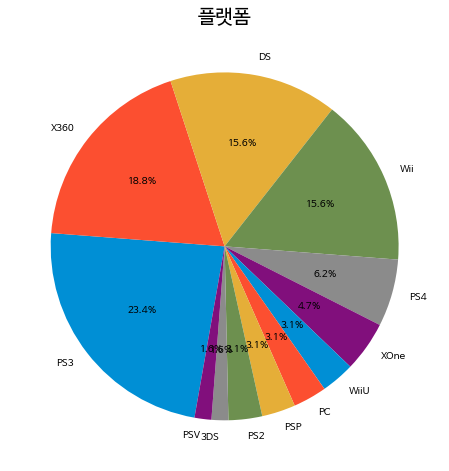

In [ ]:
label_cluster1 = cluster1['Platform'].value_counts().index.tolist()
ratio_cluster1 = cluster1['Platform'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster1, labels=label_cluster1, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('플랫폼', fontsize=20)

plt.show()

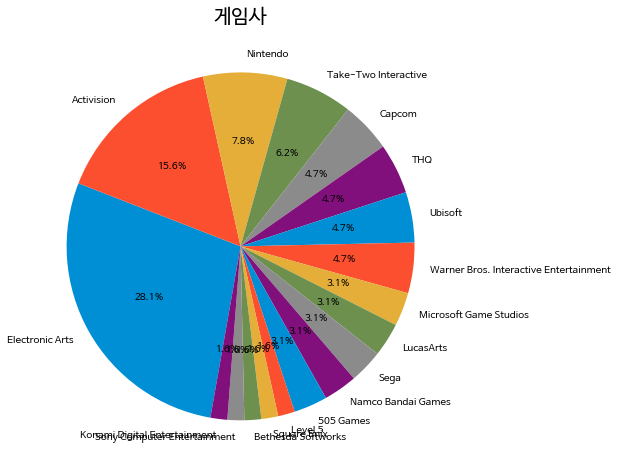

In [ ]:
label_cluster1_2 = cluster1['Publisher'].value_counts().index.tolist()
ratio_cluster1_2 = cluster1['Publisher'].value_counts().values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(ratio_cluster1_2, labels=label_cluster1_2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('게임사', fontsize=20)

plt.show()

In [ ]:
df_topsales.groupby(['Platform']).size()

Platform
3DS      1
DS      10
GB       1
GBA      5
N64      5
PC       2
PS      12
PS2      9
PS3     15
PS4      4
PSP      2
PSV      1
SAT      2
Wii     10
WiiU     2
X360    14
XB       2
XOne     3
dtype: int64

In [ ]:
df_topsales.sort_values(by='Year', ascending=False)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,5Years,total_sales
Name,,,,,,,,,,
FIFA 17,PS4,2016,Sports,Electronic Arts,280000.00,3.75,0.06,0.69,2013,280004.50
Super Mario Maker,WiiU,2015,Platform,Nintendo,1180000.00,0.87,0.93,0.20,2013,1180002.00
Madden NFL 16,PS4,2015,Sports,Electronic Arts,2.33,300000.00,0.00,0.59,2013,300002.92
The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,560000.00,2013,560003.17
Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1530000.00,0.01,0.38,2013,1530003.60
...,...,...,...,...,...,...,...,...,...,...
Resident Evil Director's Cut,PS,1996,Action,Virgin Interactive,1.82,1.24,470000.00,0.25,1998,470003.31
Super Mario 64,N64,1996,Platform,Nintendo,6.91,2850000.00,1.91,0.23,1998,2850009.05
Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,1998,5550004.32
